## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 407k/407k [00:00<00:00, 478kB/s]


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

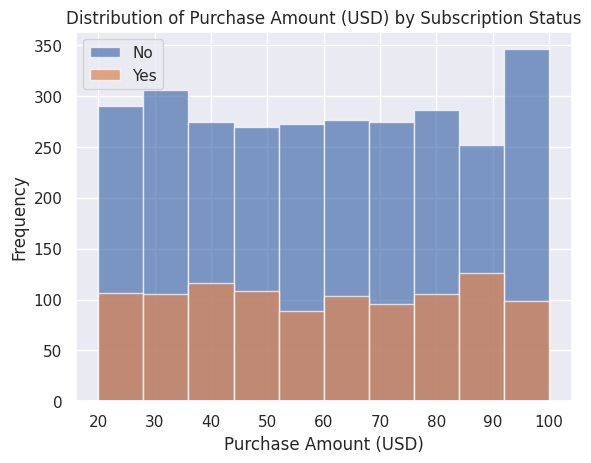

In [9]:
plt.hist(df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'], alpha=0.7, label='No')
plt.hist(df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'], alpha=0.7, label='Yes')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount (USD) by Subscription Status')
plt.legend()
plt.show()

# number of people who has a Subscription is less than who doesn’t

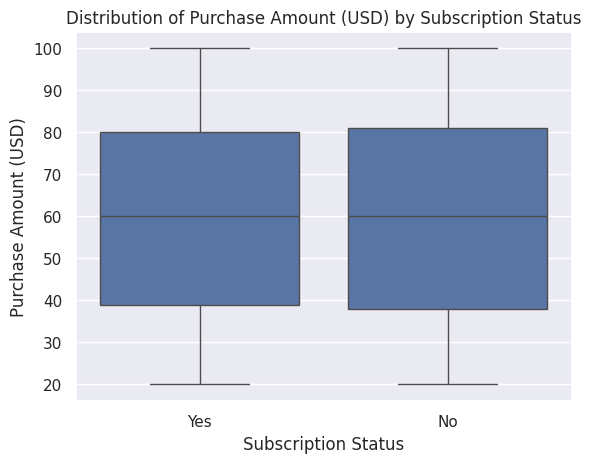

In [8]:
plt.title('Distribution of Purchase Amount (USD) by Subscription Status')
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.show()

# there is no outliers

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

/tmp/ipython-input-52838167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Payment Method' , order = order , palette='viridis')


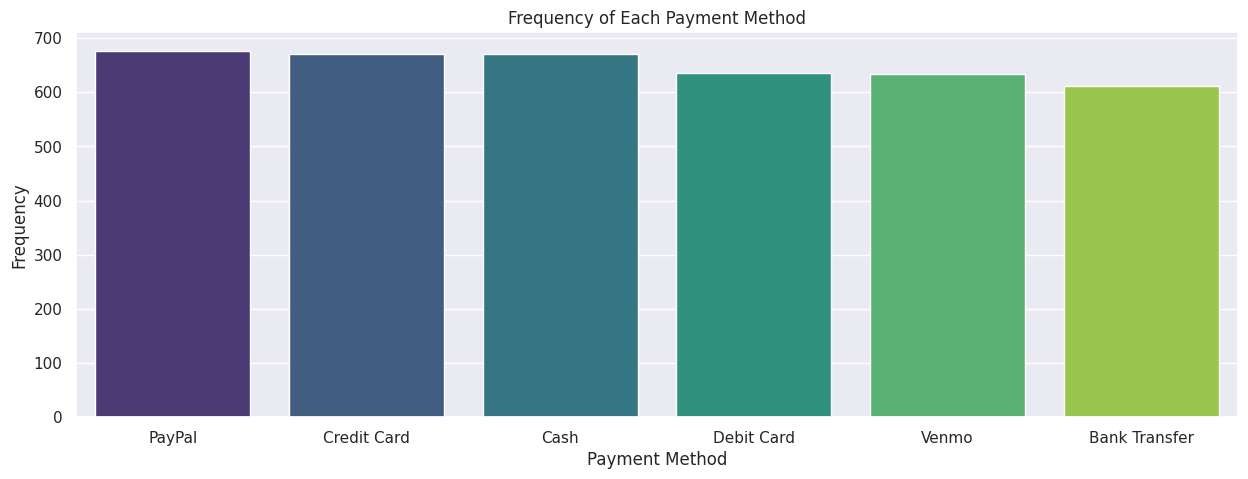

In [18]:
plt.figure(figsize=(15,5))
order = df['Payment Method'].value_counts().index
sns.countplot(data = df, x = 'Payment Method' , order = order , palette='viridis')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Frequency of Each Payment Method')
plt.show()

# high amount of customers prefer paying with paypal and bank transfer is the least prefered method

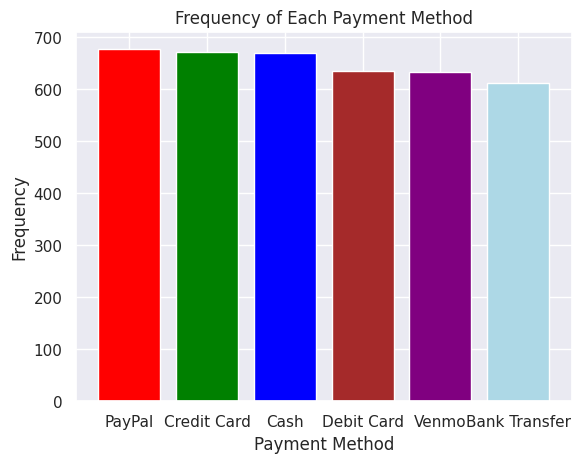

In [20]:
data = df['Payment Method'].value_counts()
labels = data.index
values = data.values
plt.bar(labels, values , color =['red' ,'green' ,'blue' , 'brown' , 'purple' , 'lightblue'])
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Frequency of Each Payment Method')
plt.show()



### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

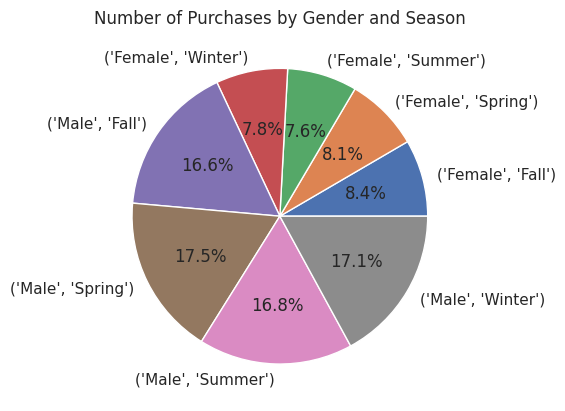

In [24]:
data = df.groupby(['Gender', 'Season'])['Purchase Amount (USD)'].count()
plt.pie(data.values, labels=data.index, autopct='%1.1f%%')
plt.title('Number of Purchases by Gender and Season')
plt.show()

# the number of purchases for males in all seasons is more than females

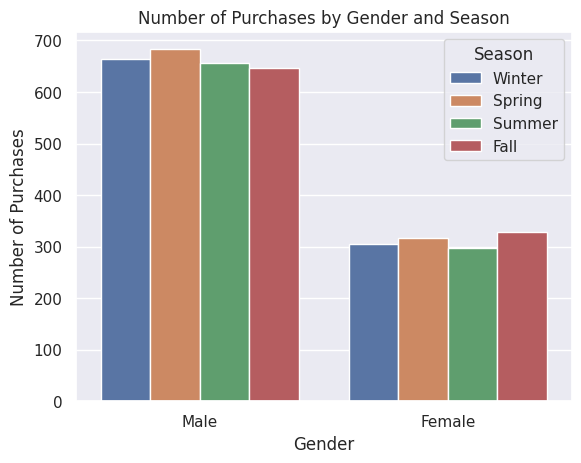

In [44]:
sns.countplot(data=df, x='Gender', hue='Season')
plt.title('Number of Purchases by Gender and Season')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()


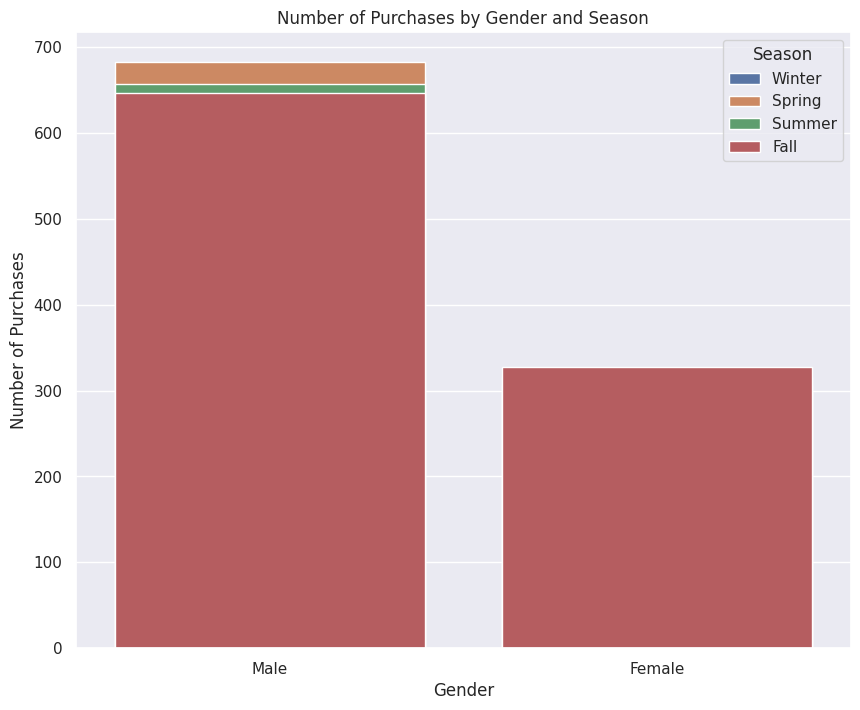

In [45]:
# but i think the first one is more pleasent to eye
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Gender', hue='Season' ,dodge=False)
plt.title('Number of Purchases by Gender and Season')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

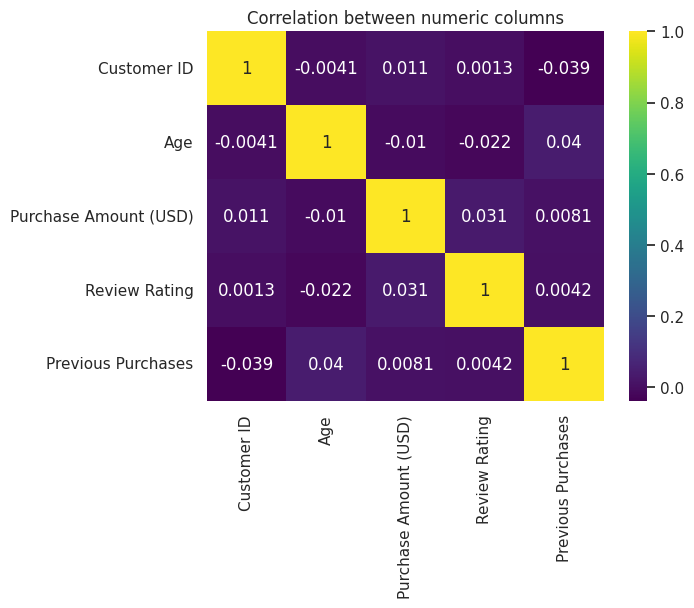

In [40]:
correlation = df.select_dtypes(exclude='object').corr()
sns.heatmap(correlation , cmap ='viridis' , annot = True)
plt.title('Correlation between numeric columns')
plt.show()

# relationship between Previous Purchases, Purchase Amount, and Review Rating is positive weak , this  means the dependency is small

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

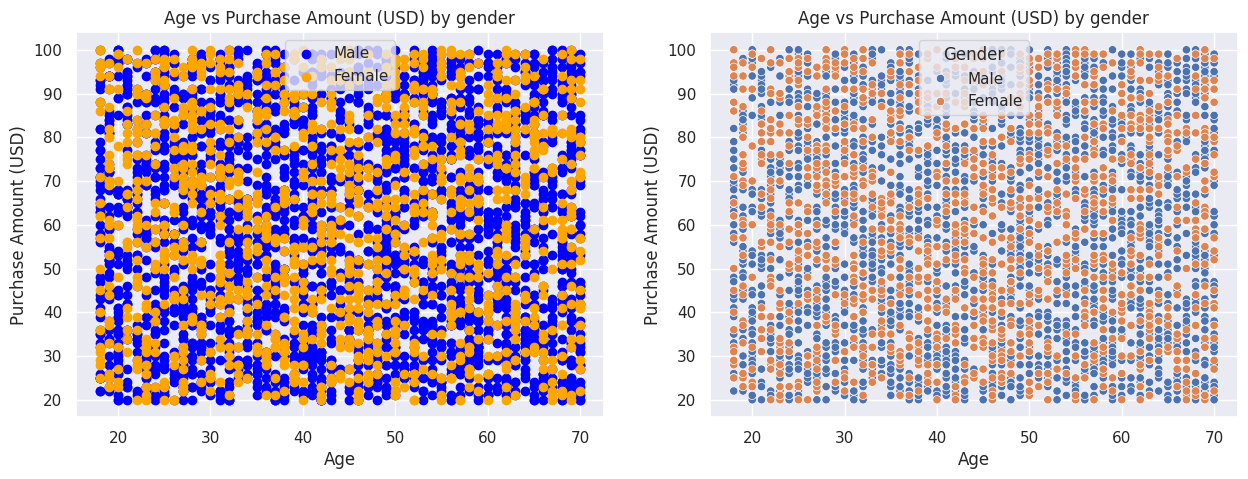

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(df[df['Gender'] == 'Male']['Age'], df[df['Gender'] == 'Male']['Purchase Amount (USD)'], label='Male', color='blue')
plt.scatter(df[df['Gender'] == 'Female']['Age'], df[df['Gender'] == 'Female']['Purchase Amount (USD)'], label='Female', color='orange')
plt.title('Age vs Purchase Amount (USD) by gender')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Gender', data=df)
plt.title('Age vs Purchase Amount (USD) by gender')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')

plt.show()

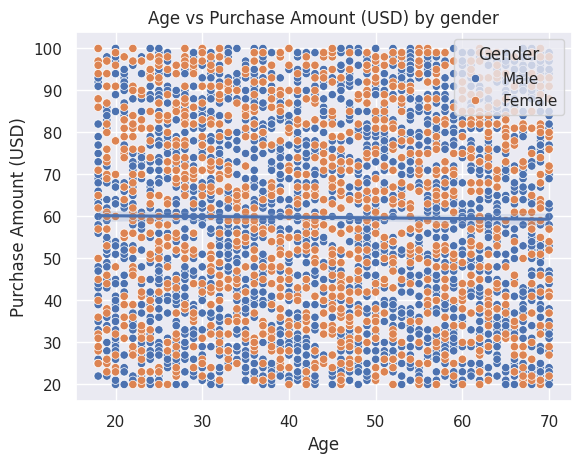

In [72]:
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Gender', data=df)
sns.regplot(x='Age', y='Purchase Amount (USD)', data=df, scatter=False)
plt.title('Age vs Purchase Amount (USD) by gender')
plt.xlabel('Age')
plt.show()

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

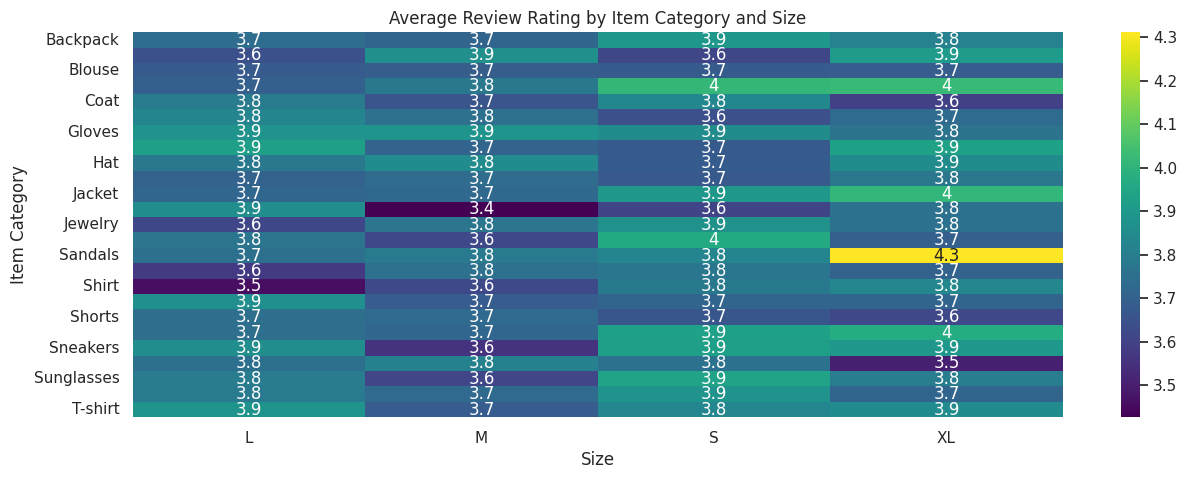

In [157]:
plt.figure(figsize=(15,5))
pivot_df = df.pivot_table(
    index='Item Purchased',
    columns='Size',
    values='Review Rating',
    aggfunc='mean'  # or 'sum', 'count', 'max', etc. depending on your use case
)
sns.heatmap(pivot_df, cmap='viridis', annot=True)
plt.title('Average Review Rating by Item Category and Size')
plt.xlabel('Size')
plt.ylabel('Item Category')
plt.show()

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

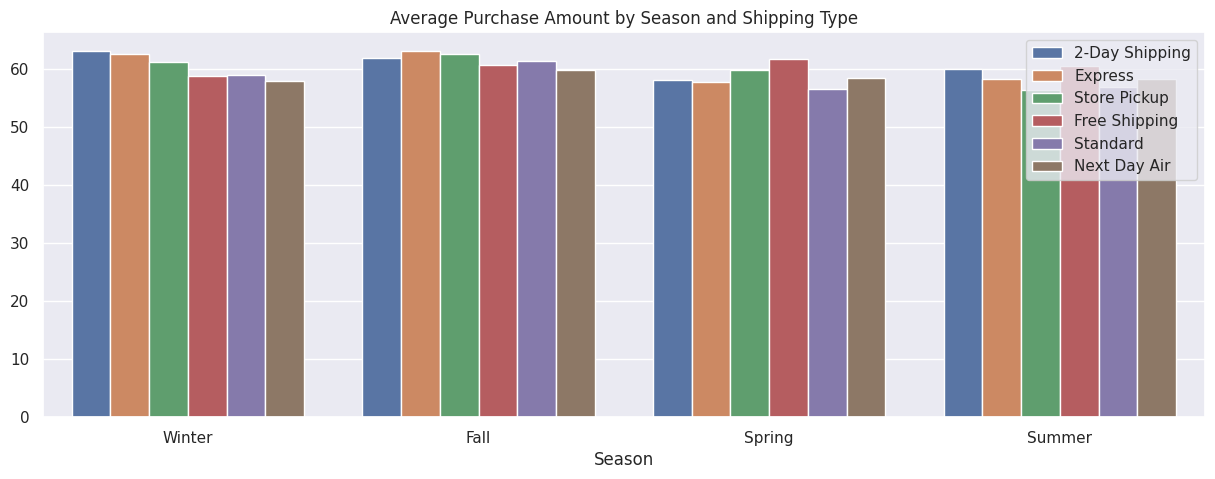

In [148]:
data = df.groupby(['Season' ,'Shipping Type'])['Purchase Amount (USD)'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x=data.index.get_level_values(0), y=data.values, hue=data.index.get_level_values(1))
plt.title('Average Purchase Amount by Season and Shipping Type')
plt.xlabel('Season')
plt.legend()
plt.show()

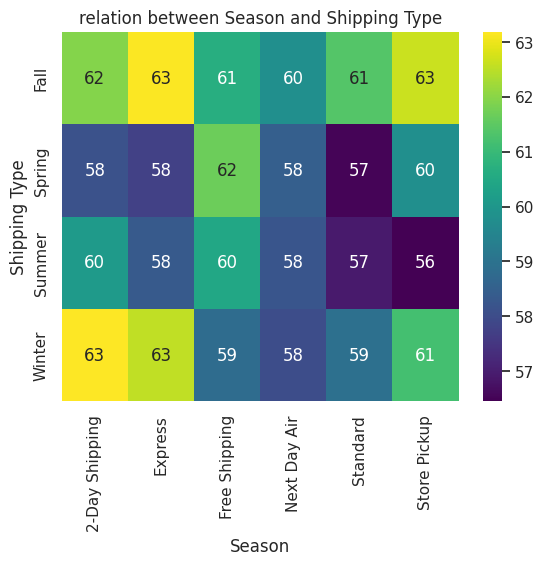

In [149]:
sns.heatmap(df.groupby(['Season' ,'Shipping Type'])['Purchase Amount (USD)'].mean().unstack(), cmap='viridis', annot=True)
plt.title('relation between Season and Shipping Type')
plt.xlabel('Season')
plt.ylabel('Shipping Type')
plt.show()

# we can see that each season has diffrent Average Purchase Amount by Shipping Type and the highest in each season is :
- winter -> 2-day shipping
- fall -> express shepping
- spring -> free shipping
- summer -> 2-day shipping and free shipping

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

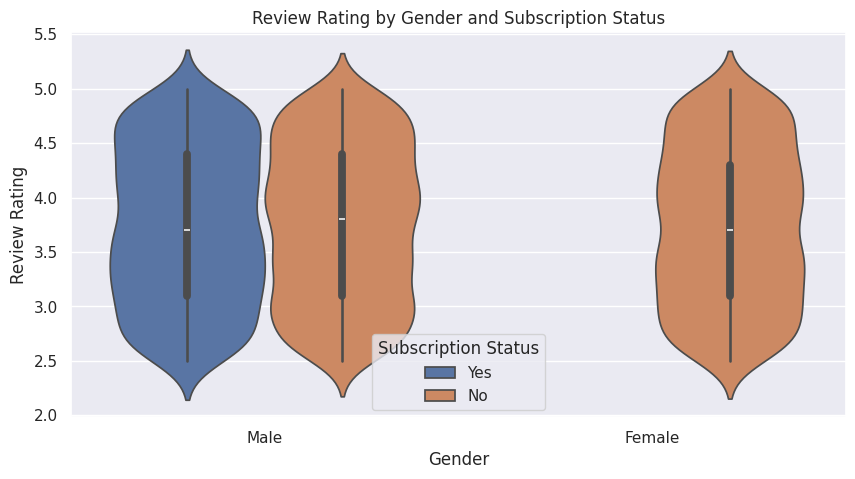

In [131]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='Gender', y='Review Rating', hue='Subscription Status')
plt.title('Review Rating by Gender and Subscription Status')
plt.xlabel('Gender')
plt.ylabel('Review Rating')
plt.show()

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

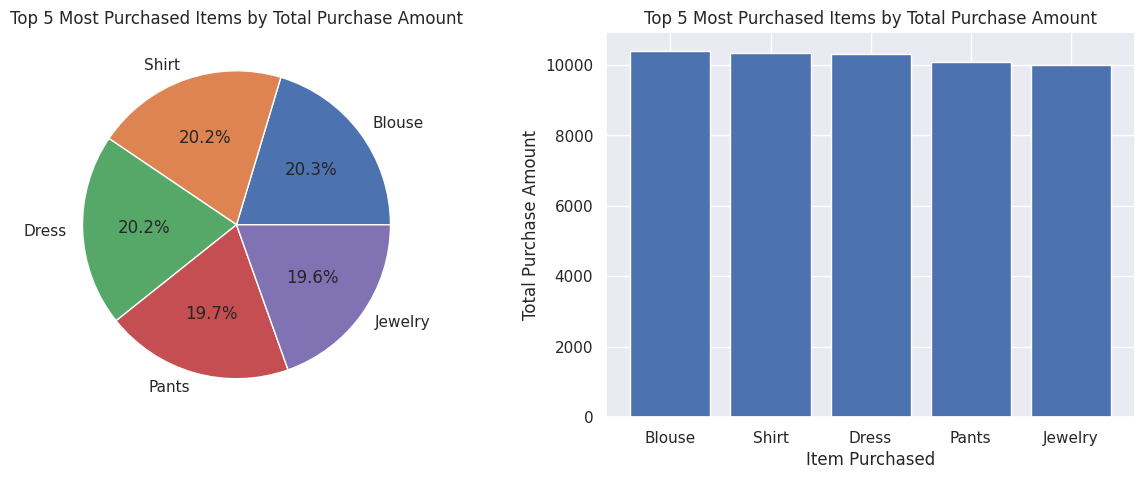

In [128]:
data = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(data.values, labels=data.index, autopct='%1.1f%%')
plt.title('Top 5 Most Purchased Items by Total Purchase Amount')

plt.subplot(1,2,2)
plt.bar(data.index, data.values)
plt.title('Top 5 Most Purchased Items by Total Purchase Amount')
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount')
plt.show()

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

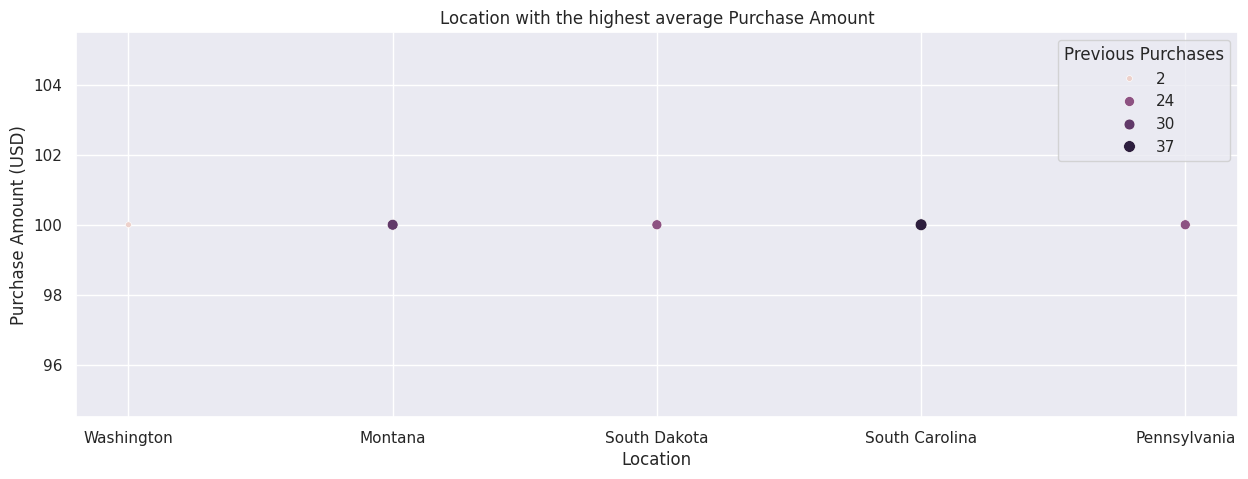

In [123]:
plt.figure(figsize=(15,5))
data = df.sort_values(by='Purchase Amount (USD)' , ascending = False).head(5)
sns.scatterplot(data = data , x = 'Location' , y= 'Purchase Amount (USD)' , size = 'Previous Purchases' , hue='Previous Purchases' )
plt.title('Location with the highest average Purchase Amount')
plt.show()

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

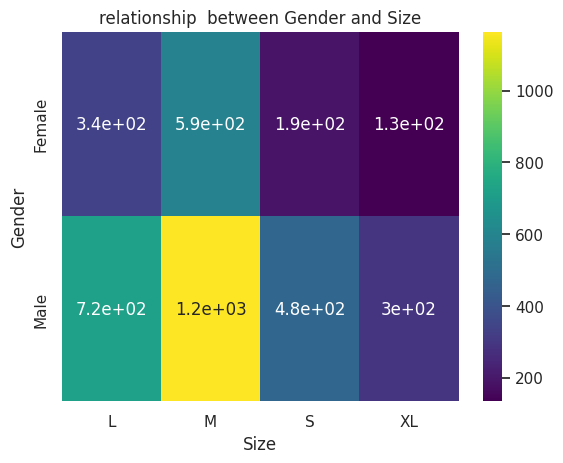

In [108]:
ct = pd.crosstab(df['Gender'] , df['Size'])
sns.heatmap(ct , cmap = 'viridis' , annot = True)
plt.title('relationship  between Gender and Size')
plt.show()

# size M is the most bought size in both genders

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

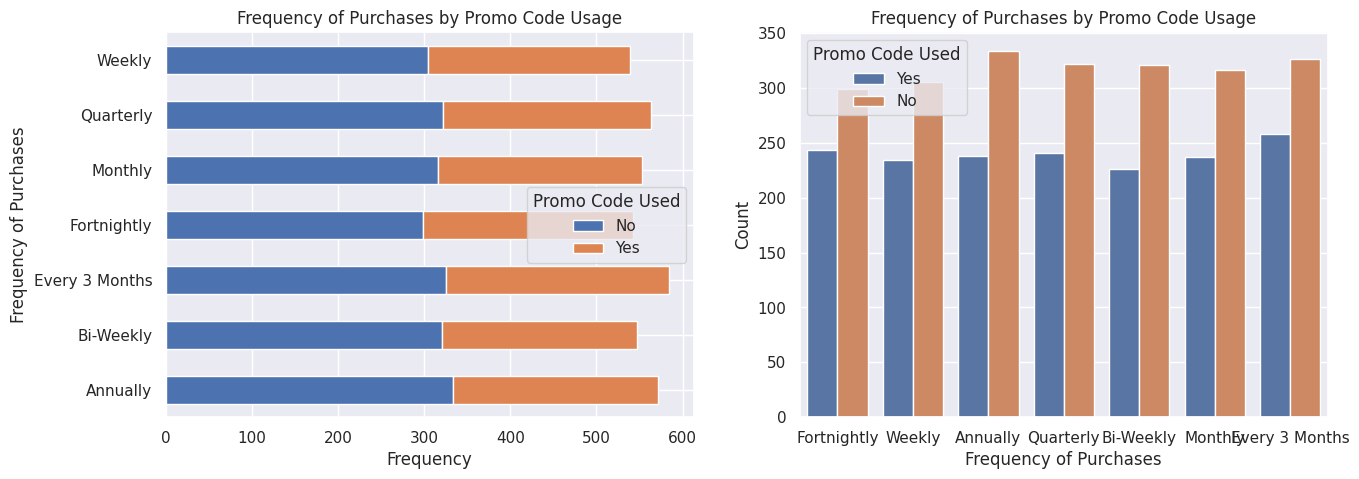

In [100]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
promo_counts = df.groupby(['Frequency of Purchases', 'Promo Code Used']).size().unstack(fill_value=0)
promo_counts.plot(kind='barh', stacked=True, ax=plt.gca())
plt.title('Frequency of Purchases by Promo Code Usage')
plt.xlabel('Frequency')
plt.ylabel('Frequency of Purchases')
plt.legend(title='Promo Code Used')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Frequency of Purchases', hue='Promo Code Used')
plt.title('Frequency of Purchases by Promo Code Usage')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.legend(title='Promo Code Used')
plt.show()

# promo codes encourage people to buy more

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

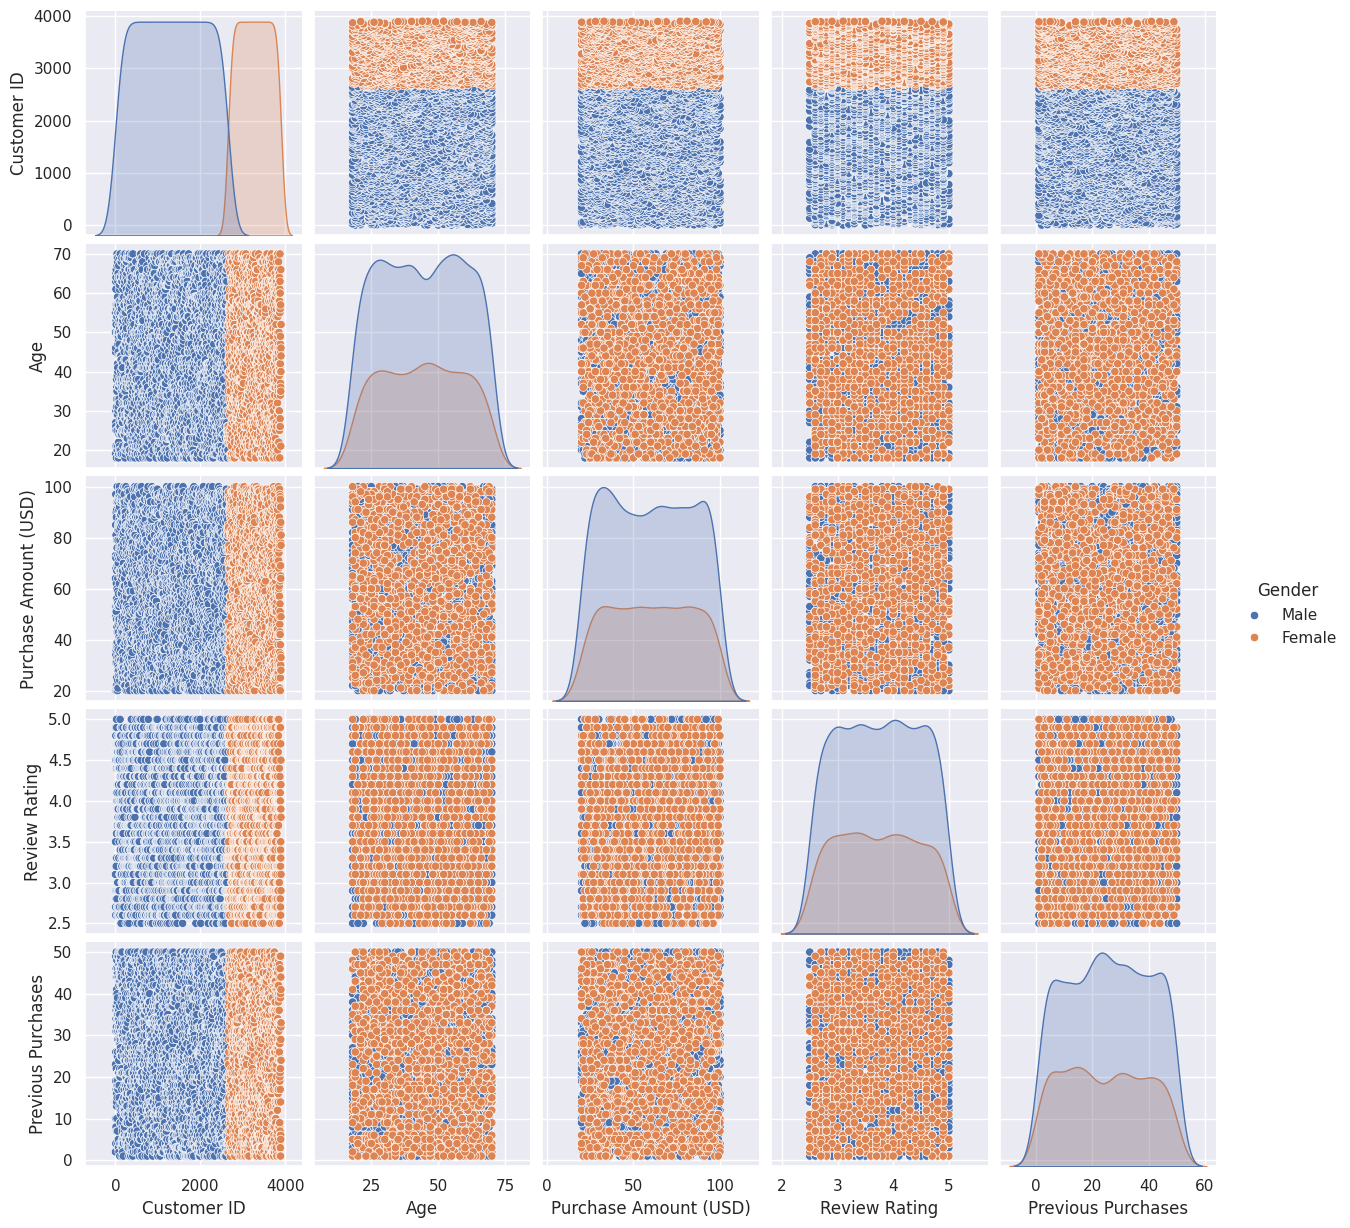

In [84]:
sns.pairplot(data = df , hue='Gender')

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.groupby(['Season', 'Shipping Type'])['Purchase Amount (USD)'].mean().unstack(), cmap='viridis', annot=True)
plt.title('Average Purchase Amount by Season and Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Season')
plt.show()